In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
import pandas_profiling
import gc
import datetime
%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [3]:
# Loading our data
#from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv("drive/MyDrive/Data for Analysis/ecommerce_data.csv", encoding = 'ISO-8859-1')


In [ ]:
df.head()
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# EDA
df.shape # 8 columns 541909 records

(541909, 8)

In [5]:
df.info() ## look into custmer_id (Float), Invoice No  and Invoice Date (as object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df[df['InvoiceNo'].str.isnumeric()==False].head(3) # So No need to convert Invoice No as int

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M') # modified date colum to datetime from string type
df['CustomerID']=df['CustomerID'].astype(int) # currently has null so throws error. Handle nulls first

IntCastingNaNError: ignored

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# checking missing values
df.isna().sum()
df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [9]:
# see the null values
df[df['CustomerID'].isnull()==True]
#df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
#df1=df.copy()
#df1['CustomerID'].max() -- 18287.0
#df1['CustomerID'].fillna(999999,inplace=True)
#df['CustomerID'].isna().sum()
#df1['CustomerID'].isna().sum() # 0
#df1[df1['CustomerID']==999999]['CustomerID'].count()
#df2=pd.DataFrame(df1.groupby('InvoiceNo')['CustomerID'].nunique())
#df2.reset_index()
#df2[df2['CustomerID']>1]

In [10]:
# checking null values
df.isnull().sum().sort_values(ascending=False) # 536544 Invoice No Customer ID updated as 99998(i.e. for 527 rows)
df[df['InvoiceNo']=='536544'].count() # 527 rows . So null ocunt reduces from 135080 to 134553

InvoiceNo      527
StockCode      527
Description    527
Quantity       527
InvoiceDate    527
UnitPrice      527
CustomerID       0
Country        527
dtype: int64

In [11]:
df.isna().value_counts() # all possible null combinations

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  CustomerID  Country
False      False      False        False     False        False      False       False      406829
                                                                     True        False      133626
                      True         False     False        False      True        False        1454
dtype: int64

In [12]:
df.dropna(inplace=True) # will drop 134553 records

In [13]:
df.shape # 541909 before dropping & after dropping 541909-134553=407356

(406829, 8)

In [14]:
df.isna().sum() # no more nulls

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
# now we can change datatype of CustomerID from Object to Int
df['CustomerID']=df['CustomerID'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
df['Quantity'].min()


-80995

In [19]:
df[df['Quantity']<0].count() #8905 after removing other than discount records only 77 left

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

In [29]:
df[df['StockCode']=='D'].count()

InvoiceNo      77
StockCode      77
Description    77
Quantity       77
InvoiceDate    77
UnitPrice      77
CustomerID     77
Country        77
dtype: int64

In [25]:
df[(df['Description']=='Discount') & (df['Quantity']<0)]['InvoiceNo'].nunique()

65

In [20]:
df=df[(df['Description']=='Discount') | (df['Quantity']>0)] # so this removes the 8828 having qty as <0 and not a discount

In [21]:
df.shape # records:398528

(398001, 8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398001 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    398001 non-null  object        
 1   StockCode    398001 non-null  object        
 2   Description  398001 non-null  object        
 3   Quantity     398001 non-null  int64         
 4   InvoiceDate  398001 non-null  datetime64[ns]
 5   UnitPrice    398001 non-null  float64       
 6   CustomerID   398001 non-null  int64         
 7   Country      398001 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [33]:
df['Quantity']=df['Quantity'].apply(lambda x:abs(x)) # for discount related changing the quantity from -ve to +ve

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


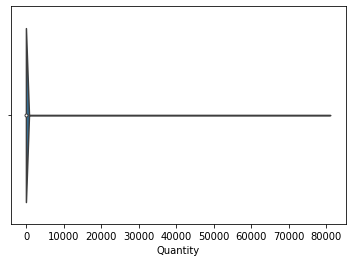

In [37]:
sns.violinplot(df['Quantity'])

In [38]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,398001.000000,398001.000000,398001.000000
mean,13.022304,3.129595,15294.244075
std,180.406725,22.322308,1713.090523
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [22]:
df[df['Quantity']<0].count()

InvoiceNo      77
StockCode      77
Description    77
Quantity       77
InvoiceDate    77
UnitPrice      77
CustomerID     77
Country        77
dtype: int64

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [23]:
# Feature Engineering Add a new column as amount Spent
df['AmountSpent']=df['Quantity']*df['UnitPrice']

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
 # Feature Engineering adding more col: yyyymm , year, month, day, dayofweek, dayofyear, weekofyear,quarter

In [ ]:
df1=df.copy()

In [25]:
lst2=['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear','quarter']
for i in lst2:
    df[i]=getattr(df['InvoiceDate'].dt,i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4


In [28]:
df['yearmm']=df['InvoiceDate'].dt.strftime('%Y%m').astype(int)

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,yearmm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,335,48,4,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,335,48,4,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,335,48,4,201012


In [48]:
df['yearmm']=df['yearmm'].astype(int)

In [29]:
df['dayofweek']=df['dayofweek']+1

In [52]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,yearmm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,3,335,48,4,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,3,335,48,4,201012


Analysis start

In [55]:
df['InvoiceDate'].agg(['min','max'])    # we have 1 year data

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [63]:
df[df['Country']=='Unspecified']['CustomerID'].nunique() # there is a country as Unspecified for 4 CustomerID

4

In [62]:
np.intersect1d(df[df['Country']=='Unspecified']['CustomerID'],df[df['Country']=='Unspecified']['CustomerID']) # None of the CustomerID having country as Unspecified has any other country in db

array([12363, 12743, 14265, 16320])

In [64]:
sales_cust_cntry=df.groupby(['Country','CustomerID'],as_index=False)['InvoiceNo'].nunique().sort_values(by='InvoiceNo',ascending=False)
sales_cust_cntry.reset_index(drop=True,inplace=True)

No.of Sales made per country and per customer

In [65]:
sales_cust_cntry=df.groupby(['Country','CustomerID'],as_index=False)['InvoiceNo'].nunique().sort_values(by='InvoiceNo',ascending=False)
sales_per_country=df.groupby(['Country'],as_index=False)['InvoiceNo'].nunique().sort_values(by='InvoiceNo',ascending=False)
sales_per_cust=df.groupby(['CustomerID'],as_index=False)['InvoiceNo'].nunique().sort_values(by='InvoiceNo',ascending=False)

ignore below code

In [ ]:
 df2=df.groupby(['Country','CustomerID'],as_index=False)['InvoiceNo'].agg(['nunique','count'])
 df2.reset_index(inplace=True)
 df2.sort_values(by='count',ascending=False)

continue

In [66]:
sales_per_cust.reset_index(drop=True,inplace=True)
sales_per_country.reset_index(drop=True,inplace=True)
sales_cust_cntry.reset_index(drop=True,inplace=True)

In [67]:
sales_per_cust.head()
sales_per_country.head()
sales_cust_cntry.head()

,Country,CustomerID,InvoiceNo
0,United Kingdom,12748,210
1,EIRE,14911,202
2,United Kingdom,17841,124
3,United Kingdom,13089,97
4,United Kingdom,14606,93


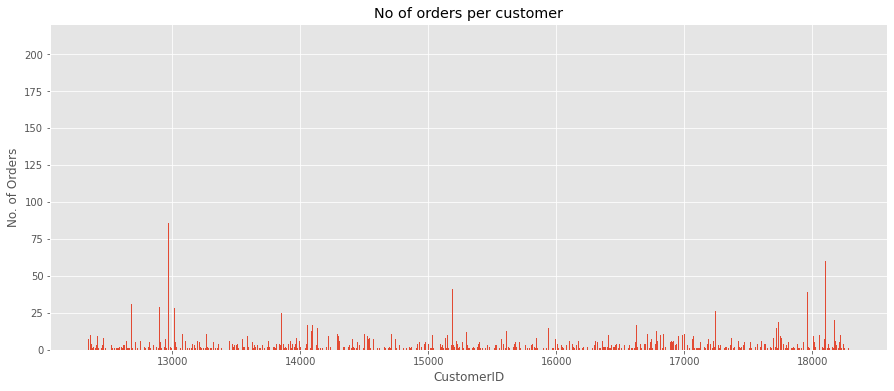

In [73]:
plt.subplots(figsize=(15,6))
plt.style.use('ggplot')
plt.bar(sales_per_cust['CustomerID'],sales_per_cust['InvoiceNo'])
plt.xlabel('CustomerID')
plt.ylabel('No. of Orders')
plt.title('No of orders per customer')
plt.show()

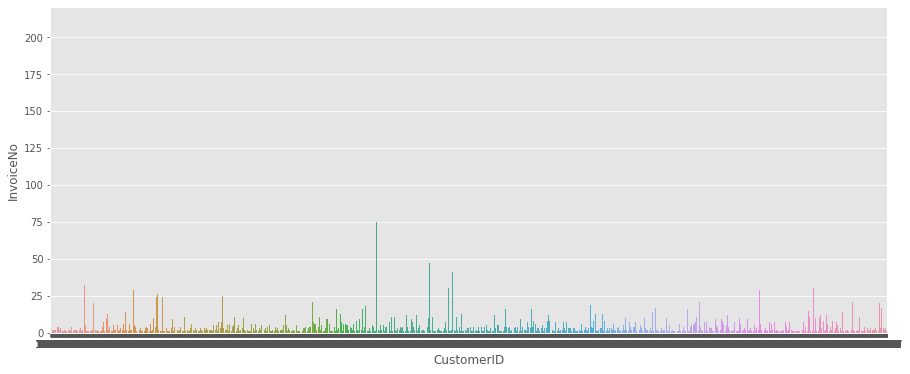

In [101]:
plt.subplots(figsize=(15,6))
barplt=sns.barplot(data=sales_per_cust,x='CustomerID',y='InvoiceNo')

In [102]:
sales_per_cust['InvoiceNo'].max()

210

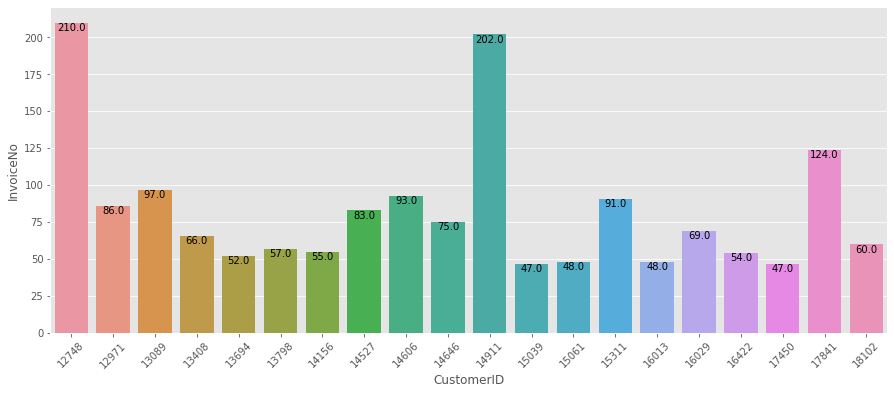

In [100]:
sales_per_cust_top20=sales_per_cust.sort_values('InvoiceNo',ascending=False).head(20)
plt.subplots(figsize=(15,6))
barplt=sns.barplot(data=sales_per_cust_top20,x='CustomerID',y='InvoiceNo')
plt.xticks(rotation=45)
for p in barplt.patches:
    barplt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'top', 
                   size=10)

In [98]:
sales_per_cust_top20.head()

,CustomerID,InvoiceNo
0,12748,210
1,14911,202
2,17841,124
3,13089,97
4,14606,93


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

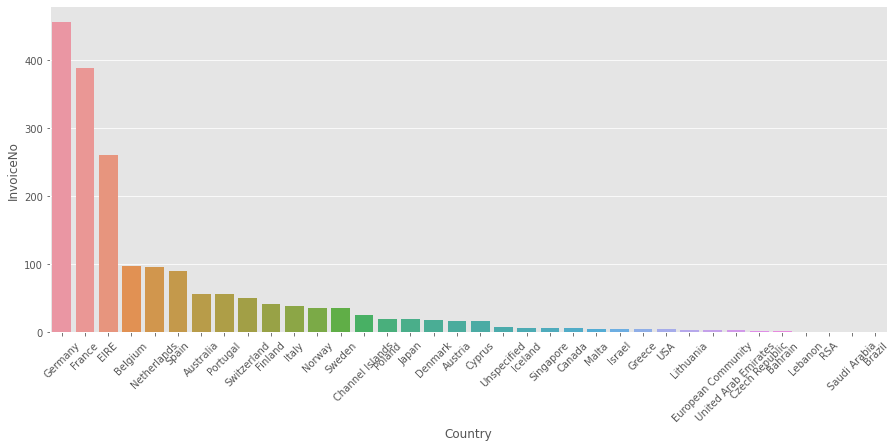

In [81]:
plt.subplots(figsize=(15,6))
sns.barplot(data=sales_per_country[sales_per_country['Country']!='United Kingdom'],x='Country',y='InvoiceNo')
plt.xticks(rotation=45)

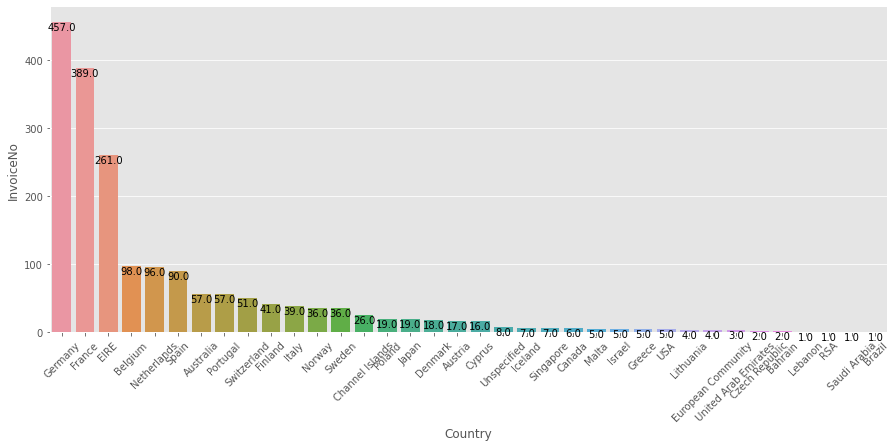

In [93]:
plt.subplots(figsize=(15,6))
plt.xticks(rotation=45)
barplt=sns.barplot(data=sales_per_country[sales_per_country['Country']!='United Kingdom'],x='Country',y='InvoiceNo')
for p in barplt.patches:
    barplt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'top', 
                   size=10)

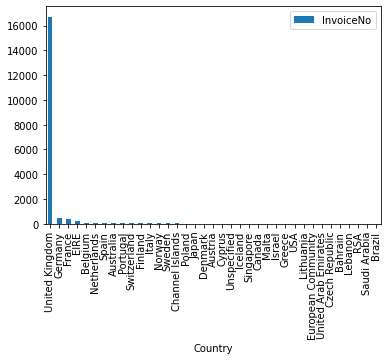

In [ ]:
sales_per_country.plot(x='Country',y='InvoiceNo',kind='bar')

In [112]:
sales_per_cntry=df.groupby('Country').agg({'InvoiceNo':'nunique','AmountSpent':'sum'}).reset_index().rename(columns={'InvoiceNo':'No. of Orders','AmountSpent':'Total Revenue'})

In [113]:
sales_per_cntry.head()


,Country,No. of Orders,Total Revenue
0,Australia,57,138521.31
1,Austria,17,10198.68
2,Bahrain,2,548.40
3,Belgium,98,41196.34
4,Brazil,1,1143.60


In [110]:
sales_per_country[sales_per_country['Country']=='Australia']

,Country,InvoiceNo
7,Australia,57


In [117]:
sales_per_cntry.sort_values('Total Revenue', ascending=False)

,Country,No. of Orders,Total Revenue
35,United Kingdom,16711,7313420.534
23,Netherlands,96,285652.740
10,EIRE,261,265980.410
14,Germany,457,228867.140
13,France,389,209024.050
0,Australia,57,138521.310
30,Spain,90,61577.110
32,Switzerland,51,56443.950
3,Belgium,98,41196.340
31,Sweden,36,38378.330


Customer Purchasing Patterns

In [118]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,yearmm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,3,335,48,4,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,3,335,48,4,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,3,335,48,4,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,3,335,48,4,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,3,335,48,4,201012


No. of Orders per month

In [122]:
orders_per_month=df.groupby('yearmm')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo':'No.ofOrders'})

Text(0.5, 1.0, 'No. of Orders per Month')

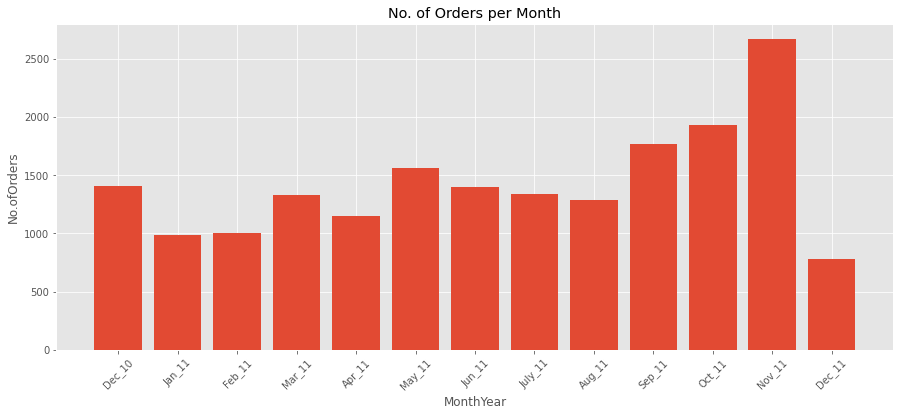

In [170]:
plt.subplots(figsize=(15,6))
plt.bar(orders_per_month['yearmm'].astype(str),orders_per_month['No.ofOrders'])
plt.xlabel('MonthYear')
plt.ylabel('No.ofOrders')
plt.xticks(np.arange(0,13),['Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'],rotation=45)
plt.title('No. of Orders per Month')

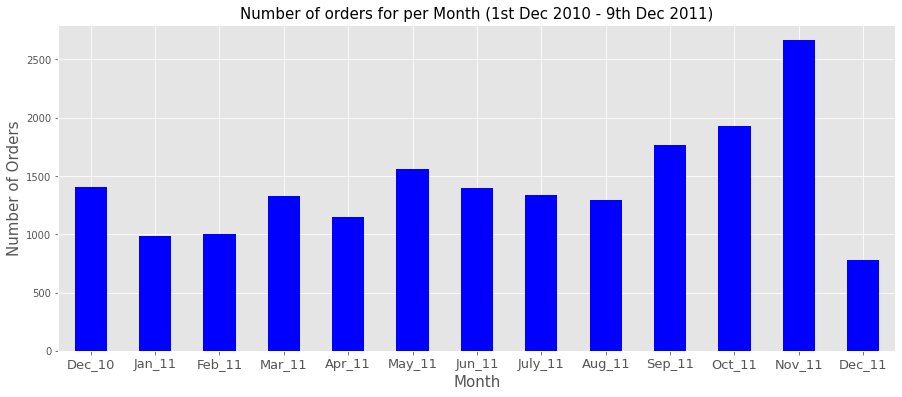

In [135]:
ax = df.groupby('InvoiceNo')['yearmm'].unique().value_counts().sort_index().plot(kind='bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

No. of Orders per day of the week

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tues'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thurs'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sun')]

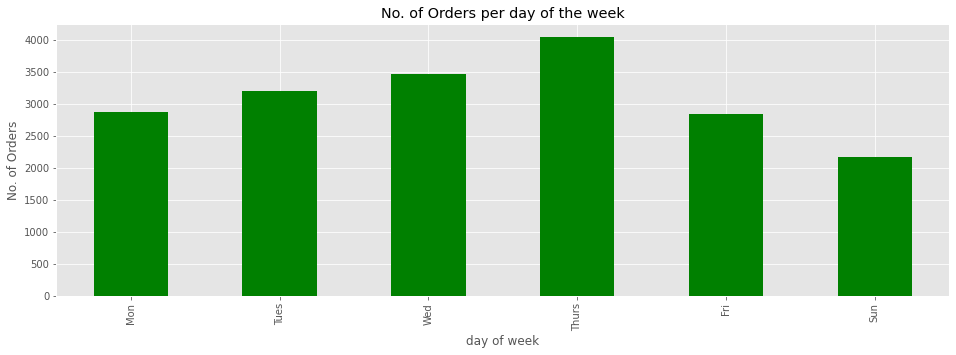

In [185]:
ax=df.groupby('dayofweek')['InvoiceNo'].nunique().plot(kind='bar',color='green',figsize=(16,5))
ax.set_xlabel('day of week')
ax.set_ylabel('No. of Orders')
ax.set_title('No. of Orders per day of the week')
ax.set_xticklabels(('Mon','Tues','Wed','Thurs','Fri','Sun'))

No. of Orders per hour

In [179]:
df['Hour']=df['InvoiceDate'].dt.hour

Text(0.5, 1.0, 'No. of Orders placed during the day')

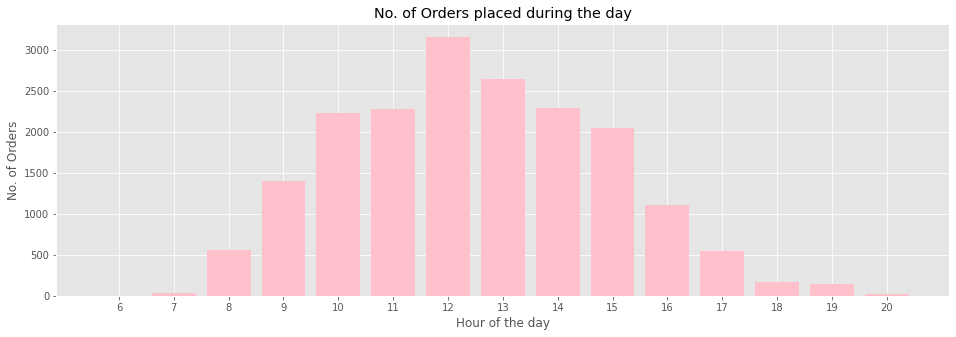

In [187]:
orders_per_hour=df.groupby('Hour')['InvoiceNo'].nunique()
plt.subplots(figsize=(16,5))
plt.bar(orders_per_hour.index.astype(str),orders_per_hour,color='pink')
plt.xlabel('Hour of the day')
plt.ylabel('No. of Orders')
plt.title('No. of Orders placed during the day')

Analysing Unit Price. Found stockCode with 0 price (free items)

In [189]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,yearmm,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,3,335,48,4,201012,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,3,335,48,4,201012,8


In [44]:
df.sort_values('UnitPrice',ascending=False)[['InvoiceNo','StockCode','UnitPrice']].tail(5)

,InvoiceNo,StockCode,UnitPrice
187613,553000,47566,0.0
198383,554037,22619,0.0
479546,577168,M,0.0
420404,572893,21208,0.0
446125,574879,22625,0.0


In [50]:
df_free_items=df[df['UnitPrice']==0.0]

[Text(0, 0, 'Dec_10'),
 Text(0, 0, 'Jan_11'),
 Text(0, 0, 'Feb_11'),
 Text(0, 0, 'Mar_11'),
 Text(0, 0, 'Apr_11'),
 Text(0, 0, 'May_11'),
 Text(0, 0, 'Jun_11'),
 Text(0, 0, 'July_11'),
 Text(0, 0, 'Aug_11'),
 Text(0, 0, 'Sep_11'),
 Text(0, 0, 'Oct_11')]

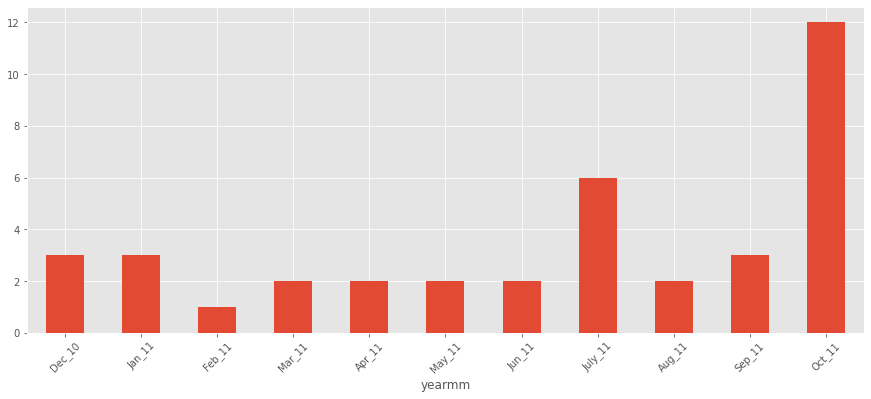

In [61]:
ax=df_free_items.groupby('yearmm')['StockCode'].nunique().plot(kind='bar',figsize=(15,6))
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'),rotation=45)

Repeat customers

In [63]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,yearmm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,3,335,48,4,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,3,335,48,4,201012


In [69]:
df.groupby('yearmm').agg({'CustomerID':'nunique'}).reset_index()

,yearmm,CustomerID
0,201012,885
1,201101,741
2,201102,761
3,201103,974
4,201104,856
5,201105,1056
6,201106,992
7,201107,949
8,201108,935
9,201109,1266


In [72]:
df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).groups

{(2010-12-31 00:00:00, 17850): [2010-12-01 08:26:00], (2011-01-31 00:00:00, 17850): [2010-12-01 08:26:00], (2011-02-28 00:00:00, 17850): [2010-12-01 08:26:00], (2011-03-31 00:00:00, 17850): [2010-12-01 08:26:00], (2011-04-30 00:00:00, 17850): [2010-12-01 08:26:00], (2011-05-31 00:00:00, 17850): [2010-12-01 08:26:00], (2011-06-30 00:00:00, 17850): [2010-12-01 08:26:00], (2011-07-31 00:00:00, 17850): [2010-12-01 08:28:00], (2011-08-31 00:00:00, 17850): [2010-12-01 08:28:00], (2011-09-30 00:00:00, 13047): [2010-12-01 08:34:00], (2011-10-31 00:00:00, 13047): [2010-12-01 08:34:00], (2011-11-30 00:00:00, 13047): [2010-12-01 08:34:00], (2011-12-31 00:00:00, 13047): [2010-12-01 08:34:00]}

In [73]:
df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

InvoiceDate
2010-12-31     855
2011-01-31     717
2011-02-28     726
2011-03-31     946
2011-04-30     831
2011-05-31    1026
2011-06-30     964
2011-07-31     924
2011-08-31     902
2011-09-30    1238
2011-10-31    1342
2011-11-30    1630
2011-12-31     597
Freq: M, Name: CustomerID, dtype: int64

In [84]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,yearmm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,3,335,48,4,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,3,335,48,4,201012


In [85]:
df[['InvoiceNo','InvoiceDate','CustomerID']].value_counts()

InvoiceNo  InvoiceDate          CustomerID
576339     2011-11-14 15:27:00  14096         542
579196     2011-11-28 15:54:00  14096         533
580727     2011-12-05 17:17:00  14096         529
578270     2011-11-23 13:39:00  14096         442
573576     2011-10-31 14:09:00  14096         435
                                             ... 
552814     2011-05-11 12:45:00  15079           1
552815     2011-05-11 12:46:00  17677           1
552833     2011-05-11 14:14:00  18133           1
575920     2011-11-11 17:01:00  15473           1
C579908    2011-12-01 08:49:00  14527           1
Length: 18631, dtype: int64

In [82]:
df[df['InvoiceNo']=='576339']['StockCode'].nunique()

541

In [89]:
Inv_cust_amt=df.groupby(['InvoiceNo','InvoiceDate','CustomerID'])['AmountSpent'].sum().reset_index()

In [90]:
Inv_cust_amt.head()

,InvoiceNo,InvoiceDate,CustomerID,AmountSpent
0,536365,2010-12-01 08:26:00,17850,139.12
1,536366,2010-12-01 08:28:00,17850,22.20
2,536367,2010-12-01 08:34:00,13047,278.73
3,536368,2010-12-01 08:34:00,13047,70.05
4,536369,2010-12-01 08:35:00,13047,17.85


In [96]:
Inv_cust_amt['yearmm']=Inv_cust_amt['InvoiceDate'].dt.strftime('%Y%m').astype(int)

In [97]:
Inv_cust_amt.head()

,InvoiceNo,InvoiceDate,CustomerID,AmountSpent,yearmm
0,536365,2010-12-01 08:26:00,17850,139.12,201012
1,536366,2010-12-01 08:28:00,17850,22.20,201012
2,536367,2010-12-01 08:34:00,13047,278.73,201012
3,536368,2010-12-01 08:34:00,13047,70.05,201012
4,536369,2010-12-01 08:35:00,13047,17.85,201012


In [130]:
Inv_cust_amt.groupby(['yearmm','CustomerID']).filter(lambda x: len(x)>1)[['yearmm','CustomerID']].groupby('yearmm')['CustomerID'].nunique()

yearmm
201012    263
201101    153
201102    153
201103    204
201104    170
201105    281
201106    221
201107    227
201108    198
201109    273
201110    324
201111    542
201112    106
Name: CustomerID, dtype: int64

In [137]:
Inv_cust_amt.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x:len(x)>1).resample('M')['CustomerID'].nunique()

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    204
2011-04-30    170
2011-05-31    281
2011-06-30    221
2011-07-31    227
2011-08-31    198
2011-09-30    273
2011-10-31    324
2011-11-30    542
2011-12-31    106
Freq: M, Name: CustomerID, dtype: int64